In [1]:
!pip install fastai --upgrade

     |████████████████████████████████| 358kB 4.6MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
!wget -r https://www.dropbox.com/s/ep8qjakfwh1rzk4/malimg_dataset.zip?dl=0

--2020-09-11 12:14:31--  https://www.dropbox.com/s/ep8qjakfwh1rzk4/malimg_dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ep8qjakfwh1rzk4/malimg_dataset.zip [following]
--2020-09-11 12:14:32--  https://www.dropbox.com/s/raw/ep8qjakfwh1rzk4/malimg_dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6f2c6fd959fe0f05fd427b1803.dl.dropboxusercontent.com/cd/0/inline/A_KQ1tmf0yZYND-Y8K77Y0r4f4aKfYfLmEzZrV3FyKiesCFXZwt7myJ4_LZneKmcBFxfda5o5X006YevLzBdMh4HDkhzLC1K_BOhDI4kCoQQIA/file# [following]
--2020-09-11 12:14:32--  https://uc6f2c6fd959fe0f05fd427b1803.dl.dropboxusercontent.com/cd/0/inline/A_KQ1tmf0yZYND-Y8K77Y0r4f4aKfYfLmEzZrV3FyKiesCFXZwt7myJ4_LZneKmcBFxfda5o5X006YevLzBdMh4HDkhzLC1K_BOhDI4kCoQQIA/f

In [4]:
!dir /content/www.dropbox.com/s/ep8qjakfwh1rzk4/malimg_dataset.zip?dl=0

/content/www.dropbox.com/s/ep8qjakfwh1rzk4/malimg_dataset.zip?dl=0


In [ ]:
!unzip /content/www.dropbox.com/s/ep8qjakfwh1rzk4/malimg_dataset.zip?dl=0 -d /content/

In [7]:
!cat /content/malimg_paper_dataset_imgs/malimg_dataset_readme.txt

The dataset contains the images of malware family names as mentioned in Tab.3 of the paper "Malware Images: Visualization and Automatic Classification" (http://dl.acm.org/citation.cfm?id=2016908)
If this dataset is used, the above paper must be cited.
This dataset is not be distributed.
Any questions, contact lakshmanan_nataraj@umail.ucsb.edu
Oct. 2013

In [10]:
path = "/content/malimg_paper_dataset_imgs"
#when using this dataset, please cite http://arxiv.org/abs/1802.10135



In [11]:
from fastai.vision.all import *

In [12]:
dls = ImageDataLoaders.from_folder(path, valid_pct=0.2, item_tfms=Resize(224))

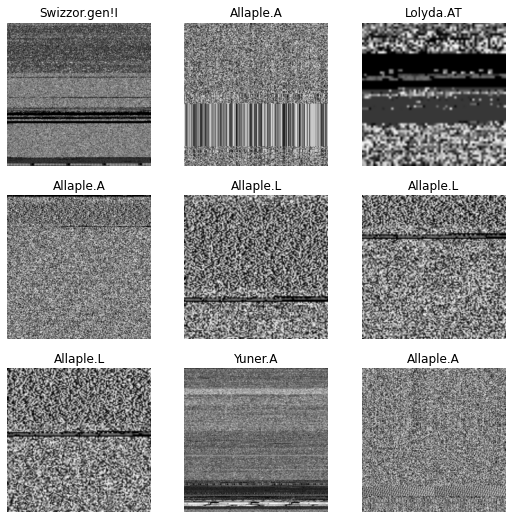

In [14]:
dls.show_batch()

In [15]:
dls.c
# number of classes

25

In [18]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [19]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.529772,0.354912,0.139261,1:09:06


epoch,train_loss,valid_loss,error_rate,time
0,0.238067,0.155109,0.046599,1:32:14
1,0.120288,0.069242,0.021960,1:32:33


In [23]:
learn.export()

In [20]:
from ipywidgets import widgets
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

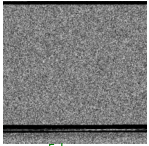

In [26]:
img = PILImage.create(uploader.data[0])
learn.predict(img)
img.to_thumb(192)

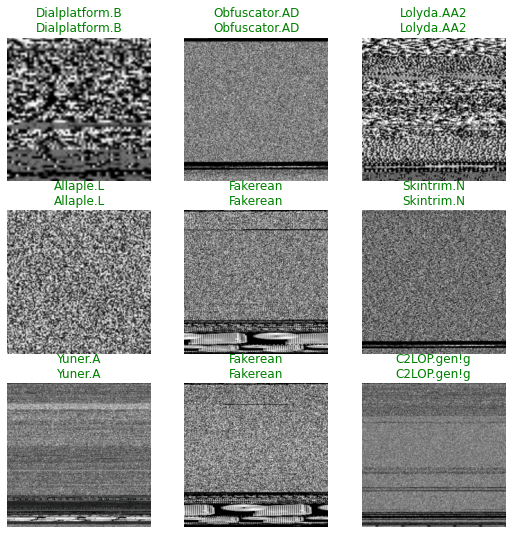

In [24]:
learn.show_results()